# Medicine Predictor 
## Pre Project
This project is my first "Data Analysis" project in a while. The goal is to explore and gain familiarity with: 
1. Jupyter Notebook
2. Kaggle
3. Python in a data science context
4. Pandas

By the end, I should have built a model that predicts what medicine a patient should take based on their symptoms.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"enhanced_fever_medicine_recommendation.csv")

In [4]:
df.head()

,Temperature,Fever_Severity,Age,Gender,BMI,Headache,Body_Ache,Fatigue,Chronic_Conditions,Allergies,Smoking_History,Alcohol_Consumption,Humidity,AQI,Physical_Activity,Diet_Type,Heart_Rate,Blood_Pressure,Previous_Medication,Recommended_Medication
0,36.1,Normal,89,Female,24.0,No,Yes,No,No,Yes,No,Yes,81.4,430,Moderate,Vegan,72,Normal,NaN,Ibuprofen
1,37.5,Mild Fever,94,Male,26.6,No,No,No,Yes,No,Yes,Yes,44.4,10,Active,Vegetarian,62,High,Ibuprofen,Paracetamol
2,36.4,Normal,92,Male,27.8,No,No,No,No,No,No,Yes,73.7,400,Sedentary,Vegan,85,High,NaN,Ibuprofen
3,39.8,High Fever,66,Male,18.7,No,Yes,No,No,No,No,No,44.1,438,Active,Non-Vegetarian,96,High,Ibuprofen,Ibuprofen
4,39.3,High Fever,28,Male,21.0,No,Yes,No,Yes,Yes,Yes,Yes,65.9,451,Active,Vegetarian,85,Low,Paracetamol,Ibuprofen


In [4]:
m_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             1000 non-null   float64
 1   Fever_Severity          1000 non-null   object 
 2   Age                     1000 non-null   int64  
 3   Gender                  1000 non-null   object 
 4   BMI                     1000 non-null   float64
 5   Headache                1000 non-null   object 
 6   Body_Ache               1000 non-null   object 
 7   Fatigue                 1000 non-null   object 
 8   Chronic_Conditions      1000 non-null   object 
 9   Allergies               1000 non-null   object 
 10  Smoking_History         1000 non-null   object 
 11  Alcohol_Consumption     1000 non-null   object 
 12  Humidity                1000 non-null   float64
 13  AQI                     1000 non-null   int64  
 14  Physical_Activity       1000 non-null   o

In [5]:
df.describe()

,Temperature,Age,BMI,Humidity,AQI,Heart_Rate
count,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,38.09890,51.152000,26.44320,60.594400,248.493000,80.14400
std,1.13887,28.873354,4.90115,17.058475,143.705244,11.79196
min,36.00000,1.000000,18.00000,30.000000,0.000000,60.00000
25%,37.20000,26.000000,22.40000,46.600000,127.750000,70.00000
50%,38.20000,51.000000,26.50000,60.950000,247.500000,80.00000
75%,39.10000,76.000000,30.52500,74.725000,375.250000,90.00000
max,40.00000,100.000000,35.00000,90.000000,499.000000,100.00000


In [6]:
df.Previous_Medication.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Previous_Medication
Non-Null Count  Dtype 
--------------  ----- 
763 non-null    object
dtypes: object(1)
memory usage: 7.9+ KB


In [7]:
df['Has_Taken_Medicine'] = df['Previous_Medication'].notnull()

In [8]:
# In the previous cell I created a column 'Has_Taken_Medicine' that shows whether or not the patient has taken medication before or not 
df.Has_Taken_Medicine.head()

0    False
1     True
2    False
3     True
4     True
Name: Has_Taken_Medicine, dtype: bool

In [24]:
# Changing the values of 'Previous_Medication' to replace null values with 'Not taken medication'
df['Previous_Medication'] = df['Previous_Medication'].fillna('Not taken medication')
df.Previous_Medication.head()

0    Not taken medication
1               Ibuprofen
2    Not taken medication
3               Ibuprofen
4             Paracetamol
Name: Previous_Medication, dtype: object

In [33]:
# Change Fever Severity to a number to plot graphs with it
df['Fever_Severity']=df.Fever_Severity.map({'Normal': 0, 'Mild Fever': 1, 'High Fever': 2})

<Axes: xlabel='Smoking_History'>

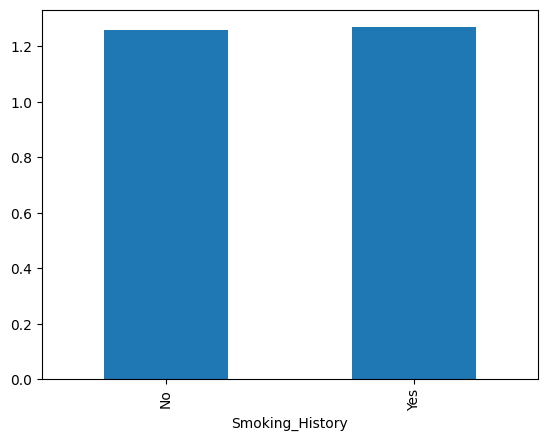

In [35]:
# Using graphs to see the correlation between smoking and fever severity
df.groupby('Smoking_History')['Fever_Severity'].mean().plot(kind="bar")

<Axes: xlabel='Gender'>

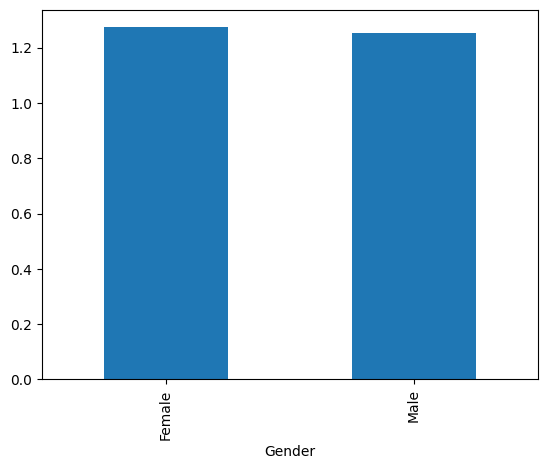

In [36]:
# Using graphs to see the correlation between gender and fever severity
df.groupby('Gender')['Fever_Severity'].mean().plot(kind='bar')

<Axes: xlabel='BMI'>

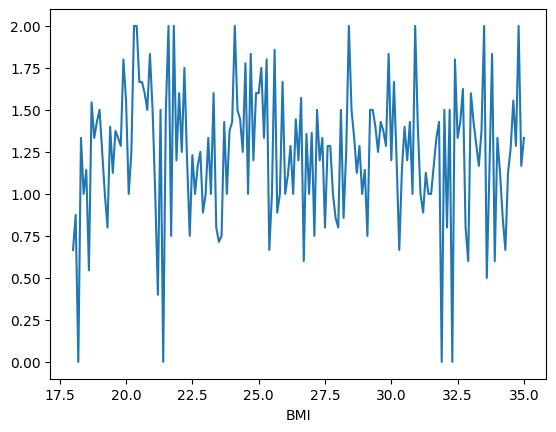

In [38]:
# Using graphs to see the correlation between bmi and fever severity
df.groupby('BMI')['Fever_Severity'].mean().plot(kind='line')

<Axes: xlabel='Headache'>

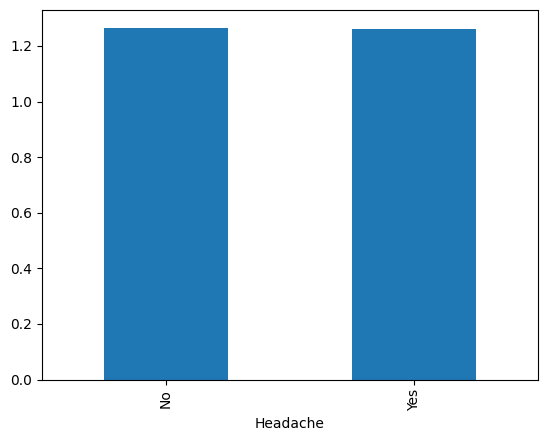

In [39]:
# Using graphs to see the correlation between headache and fever severity
df.groupby('Headache')['Fever_Severity'].mean().plot(kind='bar')

<Axes: xlabel='Body_Ache'>

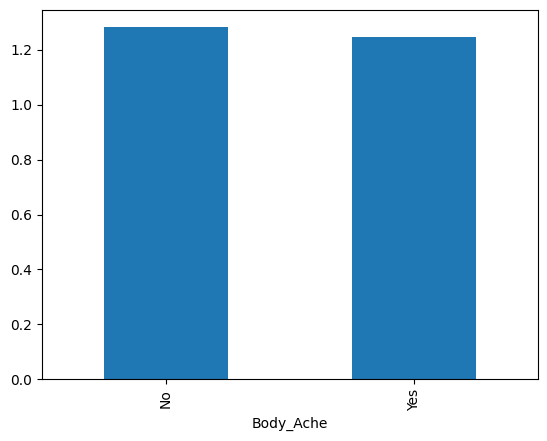

In [ ]:
# Using graphs to see the correlation between body aches and fever severity
df.groupby('Body_Ache')['Fever_Severity'].mean().plot(kind='bar')

<Axes: xlabel='Fatigue'>

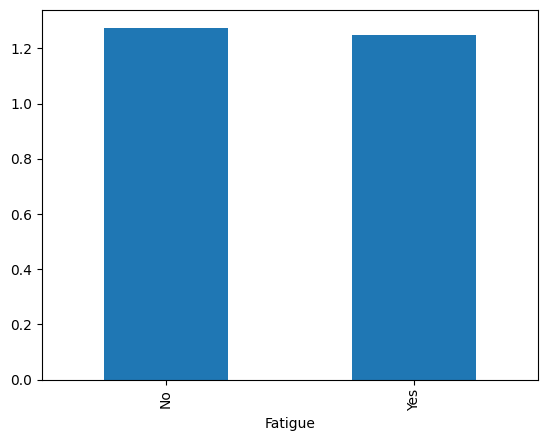

In [41]:
# Using graphs to see the correlation between fatigue and fever severity
df.groupby('Fatigue')['Fever_Severity'].mean().plot(kind='bar')

<Axes: xlabel='Chronic_Conditions'>

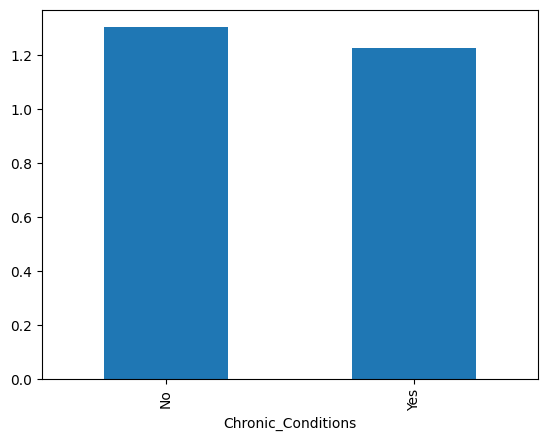

In [42]:
# Using graphs to see the correlation between chronic conditions and fever severity
df.groupby('Chronic_Conditions')['Fever_Severity'].mean().plot(kind='bar')

<Axes: xlabel='Alcohol_Consumption'>

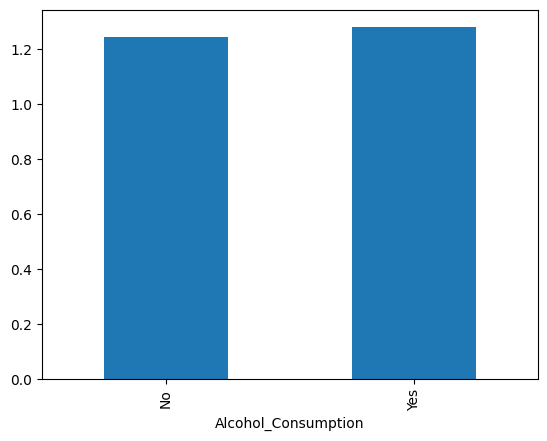

In [43]:
# Using graphs to see the correlation between alcohol consumption and fever severity
df.groupby('Alcohol_Consumption')['Fever_Severity'].mean().plot(kind='bar')

<Axes: xlabel='Humidity'>

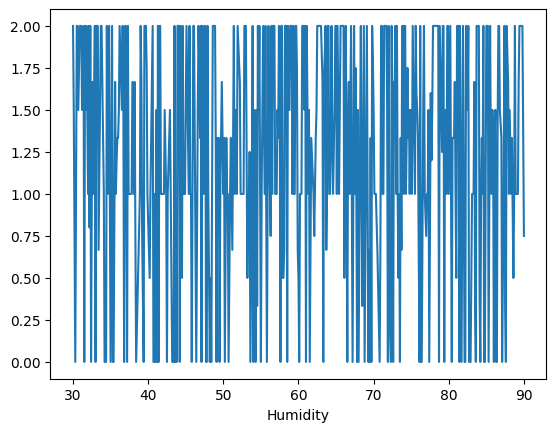

In [45]:
# Using graphs to see the correlation between humidity and fever severity
df.groupby('Humidity')['Fever_Severity'].mean().plot(kind='line')

<Axes: xlabel='Has_Taken_Medicine'>

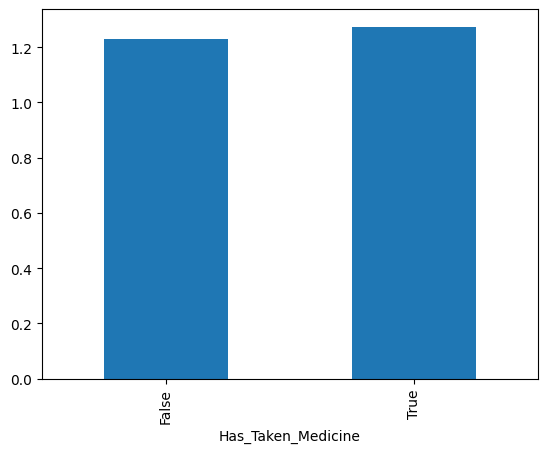

In [46]:
# Using graphs to see the correlation between whether they have taken medicine and fever severity
df.groupby('Has_Taken_Medicine')['Fever_Severity'].mean().plot(kind='bar')